In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [6]:
# load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [11]:
y_train = train.iloc[:,:1]
x_train = train.iloc[:,1:]
x_test = test
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (6304, 784)
y_train shape:  (6304, 1)
x_test shape:  (6314, 784)


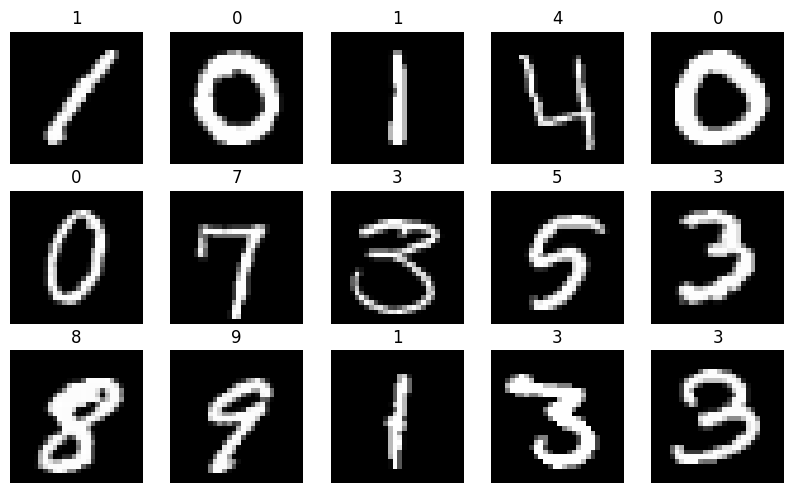

In [12]:
# display the some images
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train.iloc[i, 1:].values.reshape(28, 28), cmap="gray")
    plt.title(train.iloc[i, 0])
    plt.axis("off")

In [13]:
# explore the data
print(f"We have {len(train)} images in the training set and {len(test)} images in the test set.")
print(f"The images are {28} x {28} pixels and have {len(train.columns) - 1} features.")

We have 6304 images in the training set and 6314 images in the test set.
The images are 28 x 28 pixels and have 784 features.


In [14]:
x_train.shape, y_train.shape, x_test.shape

((6304, 784), (6304, 1), (6314, 784))

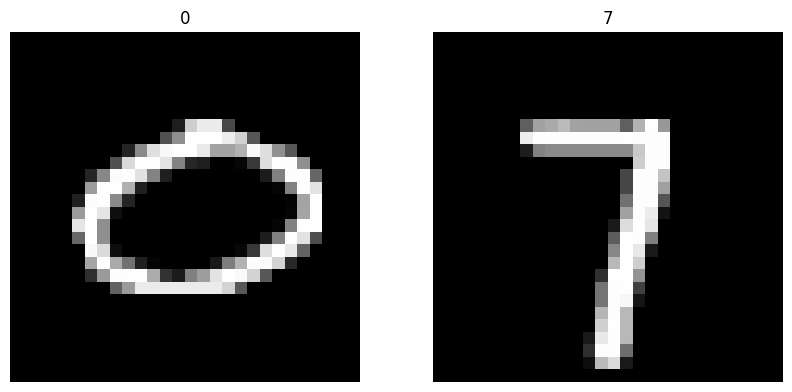

In [15]:
# select random images
import random
random_images = random.sample(range(0, len(train)), 2)

# plot the random images
plt.figure(figsize=(10, 10))
for i, image in enumerate(random_images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(train.iloc[image, 1:].values.reshape(28, 28), cmap="gray")
    plt.title(train.iloc[image, 0])
    plt.axis("off")

In [16]:
print(train['label'].unique())
print(train['label'].nunique())

[1 0 4 7 3 5 8 9 2 6]
10


In [17]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

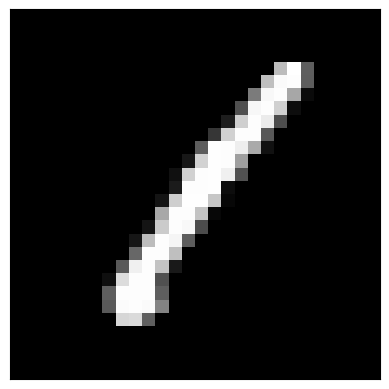

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 188 255  94   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253  93   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253 208  13   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29 207 253 235  7

<ipython-input-18-aa6306df783d>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("{:3}".format(int(pixel)), end=" ")


In [18]:
# Display the first image in the dataset as a data matrix
plt.imshow(x_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in x_train[0]:
    for pixel in row:
        print("{:3}".format(int(pixel)), end=" ")
    print()

In [19]:
# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
x_train.shape,  x_test.shape

((6304, 28, 28, 1), (6314, 28, 28, 1))

In [21]:
print("Pixel values:")
for row in x_train[0]:
    for pixel in row:
        print("{:.2f}".format(float(pixel)), end=" ")
    print()


Pixel values:
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.74 1.00 0.37 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.75 0.98 0.99 0.36 0.00 0.00 0.00 0.00 0.00 
0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.48 0.97 0.99 0.65 0.04 0.00 0.00 0.00 0.00 0.00 

<ipython-input-21-6e3faa7a0665>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("{:.2f}".format(float(pixel)), end=" ")


In [22]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

In [26]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

back = myCallback()

In [28]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1, callbacks=[back])

Epoch 1/20
158/158 [==============================] - 29s 149ms/step - loss: 1.2155 - accuracy: 0.5669 - val_loss: nan - val_accuracy: 0.9405
Epoch 2/20
158/158 [==============================] - 24s 152ms/step - loss: 0.2240 - accuracy: 0.9354 - val_loss: nan - val_accuracy: 0.9643
Epoch 3/20
158/158 [==============================] - 22s 138ms/step - loss: 0.1542 - accuracy: 0.9510 - val_loss: nan - val_accuracy: 0.9691
Epoch 4/20
158/158 [==============================] - 21s 133ms/step - loss: 0.1087 - accuracy: 0.9685 - val_loss: nan - val_accuracy: 0.9683
Epoch 5/20
158/158 [==============================] - 22s 140ms/step - loss: 0.1199 - accuracy: 0.9635 - val_loss: nan - val_accuracy: 0.9667
Epoch 6/20
158/158 [==============================] - 21s 133ms/step - loss: 0.0700 - accuracy: 0.9778 - val_loss: nan - val_accuracy: 0.9691
Epoch 7/20
158/158 [==============================] - 19s 122ms/step - loss: 0.0643 - accuracy: 0.9794 - val_loss: nan - val_accuracy: 0.9794
Epoch 

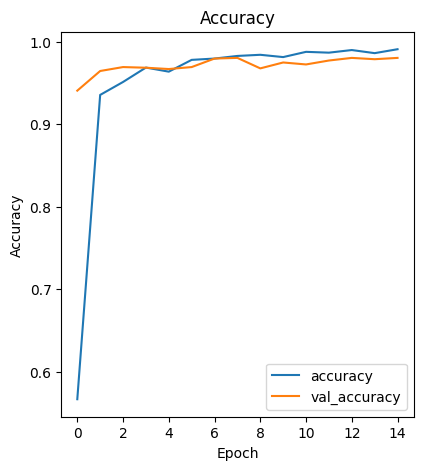

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

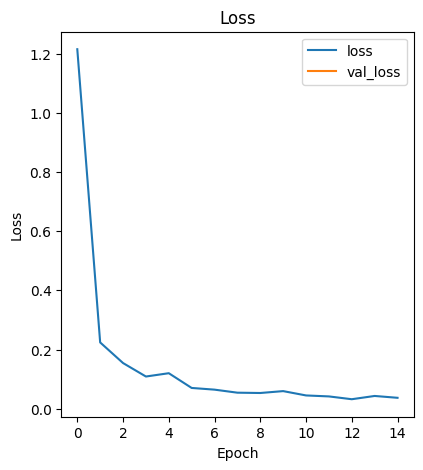

In [30]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss")
plt.show()

In [31]:
test = test.values.reshape(-1, 28, 28, 1)

# make predictions
y_cap = pd.DataFrame(model.predict(test, batch_size=200))
y_cap = pd.DataFrame(y_cap.idxmax(axis=1))
y_cap.index.name = 'ImageId'
y_cap = y_cap.rename(columns={0: 'Label'}).reset_index()
y_cap['ImageId'] = y_cap['ImageId'] + 1
y_cap.head()

32/32 [==============================] - 6s 165ms/step


,ImageId,Label
0,1,2.0
1,2,0.0
2,3,9.0
3,4,0.0
4,5,3.0


In [32]:
y_cap.to_csv("submission.csv", index=False)